# Newton Abbot Coding Club
## An Introduction to Forecasting using Python

*This initial section is a basic primer to help manage time series data structures in Python*

Before we can produce forecasts we need to learn how to manipulate and manage dates in Python's NumPy and Pandas libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates

import seaborn as sns  #seaborn is a nice plotting library that sits on top of matplotlib
sns.set()

## A quick refresher on NumPy Arrays.

NumPy is a high performance library for scientific computing in Python.  It provides the fundermental building block of the SciPy library `numpy.ndarray`

You may be familar with Python Lists. Creation and accessing individual array elements and slicing array is very similar to a list. A big difference is that a `numpy.ndarray` requires all data values to be of the **same type**.

Suppose that we want a numpy array containing the integers 4, 3, 1, 5 and 6.
(Note: a 1D array is referred to as a vector)

A simple way to create such an array and access its data is to use the following syntax.

In [6]:
arr = np.array([4, 3, 1, 5, 6])

print(f'the array contains {arr}')
print(f'a numpy array has has type {type(arr)}')
print(f'the array has a shape of {arr.shape}')
print(f'the array has a length of {len(arr)}')

the array contains [4 3 1 5 6]
a numpy array has has type <class 'numpy.ndarray'>
the array has a shape of (5,)
the array has a length of 5


#### NumPy arrays are zeroed indexed

In [7]:
print(f'The item at index 0 in the array is {arr[0]}')
print(f'The item at index 2 in the array is {arr[2]}')

The item at index 0 in the array is 4
The item at index 2 in the array is 1


#### NumPy array slicing

`[start:end]` where start is inclusive and end is exclusive

In [16]:
print(f'The first two elements in the array are {arr[:2]}')
print(f'If we want the last two items in the array we can  {arr[3:]}')
print(f'Or we can can use negative slice notation {arr[-2:]}')

The first two elements in the array are [4 3]
If we want the last two items in the array we can  [5 6]
Or we can can use negative slice notation [5 6]


## Datetimes in NumPy

If not done correctly, dates and times can be painful to use in coding!

NumPy's data type to manage datetimes is called `datetime64`. 

### Static arrays of `datetime64`

In [2]:
np.array(['2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14'], dtype='datetime64')

array(['2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14'],
      dtype='datetime64[D]')

Notice that the np.array has dtype='datetime64[D]'.  The 'D' standard for the minimum unit of days
Consider an alternative where we include hours.  You need to include the letter 'T' (for timestamp) in string pass to the numpy.array

In [17]:
np.array(['2019-07-11T06', '2019-07-12T12', '2019-07-13T01', '2019-07-14T17'], 
         dtype='datetime64')

array(['2019-07-11T06', '2019-07-12T12', '2019-07-13T01', '2019-07-14T17'],
      dtype='datetime64[h]')

That time the dtype='datetime64[h]' where 'h' stands for hours.  We can go further and try minutes.

In [18]:
np.array(['2019-07-11T00:13', '2019-07-12T00:15', '2019-07-13T00:15', '2019-07-14T00:05'], 
         dtype='datetime64')

array(['2019-07-11T00:13', '2019-07-12T00:15', '2019-07-13T00:15',
       '2019-07-14T00:05'], dtype='datetime64[m]')

And now try seconds

In [19]:
np.array(['2019-07-11T00:13:59', '2019-07-12T00:15:30', '2019-07-13T00:15:20', '2019-07-14T00:05:15'], 
         dtype='datetime64')

array(['2019-07-11T00:13:59', '2019-07-12T00:15:30',
       '2019-07-13T00:15:20', '2019-07-14T00:05:15'],
      dtype='datetime64[s]')

and miliseconds

In [20]:
np.array(['2019-07-11T00:13:59.100', '2019-07-12T00:15:30.189'], 
         dtype='datetime64')

array(['2019-07-11T00:13:59.100', '2019-07-12T00:15:30.189'],
      dtype='datetime64[ms]')

### Quick creation of date arrays using `np.arange`

`np.arange(start,stop,step)` (where stop is *exclusive*) is commonly used to produce an np.array of integers can be used to produce an array of evenly-spaced integers (particularly good for generating synthetic testing data).  

`np.arange` can also be used to generate a range of date time stamps.

*Try changing the step argument to a different value*

In [25]:
np.arange('2019-07-01', '2019-07-31', step=7, dtype='datetime64[D]')

array(['2019-07-01', '2019-07-08', '2019-07-15', '2019-07-22',
       '2019-07-29'], dtype='datetime64[D]')

In [22]:
np.arange('2019-07-01', '2019-07-31', step=7, dtype='datetime64[m]')

array(['2019-07-01T00:00', '2019-07-01T00:07', '2019-07-01T00:14', ...,
       '2019-07-30T23:43', '2019-07-30T23:50', '2019-07-30T23:57'],
      dtype='datetime64[m]')

To get all values in between two dates then *omit* the step argument.  The below generates days between 1st and 10th August

In [9]:
np.arange('2019-07-01', '2019-07-10', dtype='datetime64[D]')

array(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
       '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
       '2019-07-09'], dtype='datetime64[D]')

## Date Time Index in Python

pandas `datetimeindex` builds on numpy datetime64 data type.  Pandas is definitely the easiest way to work with time series data in Python.  One of the reasons for this is that pandas can detect and handle different formats of date strings in input files.  Always watch out for problems with US -> UK dates and vice versa.

### Static creation

If you need to create some synthetic data for testing then you can use the `pandas.date_range` function.

In [28]:
index = pd.date_range('1/1/2019', periods=7, freq='D')
index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07'],
              dtype='datetime64[ns]', freq='D')

* A hourly date range

In [34]:
index = pd.date_range('1/1/2019', periods=7, freq='h')
index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

* A 'monthly start' range.

In [35]:
index = pd.date_range('1/1/2019', periods=7, freq='MS')
index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01'],
              dtype='datetime64[ns]', freq='MS')

**Convert numpy array to datetime index**

For data manipulation and analysis I often find myself moving between NumPy arrays and pandas DataFrames. 

In [39]:
arr_dates = np.array(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64')
index = pd.DatetimeIndex(arr_dates)
index

DatetimeIndex(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64[ns]', freq=None)

Note that in the example above the frequency is **None**.  That's annoying and there are some forecasting tools in Python that will insist on having a frequency.  There are two ways to sort this out.

In [41]:
#pass in the frequency argument
arr_dates = np.array(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64')
index = pd.DatetimeIndex(arr_dates, freq='D')
index

DatetimeIndex(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64[ns]', freq='D')

In [42]:
#set the frequency post-hoc
arr_dates = np.array(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64')
index = pd.DatetimeIndex(arr_dates)
index.freq = 'D'
index

DatetimeIndex(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64[ns]', freq='D')

**Finding the min|max andin a date time index and accessing a TimeStamp**

In [43]:
index.min()

Timestamp('2019-07-11 00:00:00')

In [44]:
index.max()

Timestamp('2019-07-13 00:00:00')

In [48]:
print(index.min().year)
print(index.min().month)
print(index.min().day)

2019
7
11


## Importing data from a CSV file

First create a synthetic data set and save to csv

In [49]:
LAMBDA = 30
PERIODS = 365 * 2

idx = pd.date_range('1/1/2018', periods=PERIODS, freq='D')

# representing a count variable of sales og widgets with mean LAMBDA.
sales = np.random.poisson(LAMBDA, size=PERIODS) 
df = pd.DataFrame(sales, index=idx)
df.columns = ['sales']
df.index.name = 'date'
df.head()


,sales
date,
2018-01-01,36
2018-01-02,29
2018-01-03,39
2018-01-04,29
2018-01-05,35


In [50]:
df.to_csv('data/example_data1.csv') # save to file

Now read in the data and let pandas know that the index is a date field using the `parse_dates` argument.

In [70]:
df = pd.read_csv('data/example_data1.csv', index_col='date', parse_dates=True)
#you have to set this manually
df.index.freq='D'

In [71]:
df.head()

,sales
date,
2018-01-01,36
2018-01-02,29
2018-01-03,39
2018-01-04,29
2018-01-05,35


In [72]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=730, freq='D')

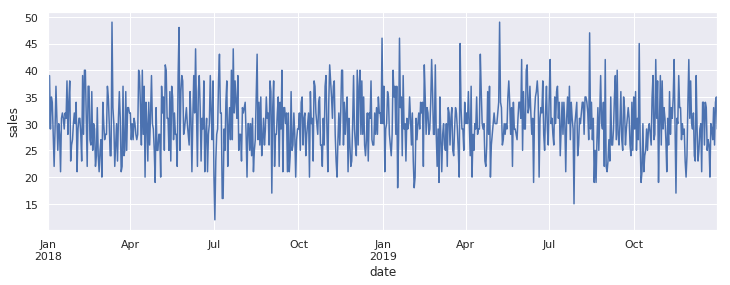

In [75]:
ax = df['sales'].plot(figsize=(12,4))
ax.set(xlabel='date', ylabel='sales');


**Limit to specific time ranges**

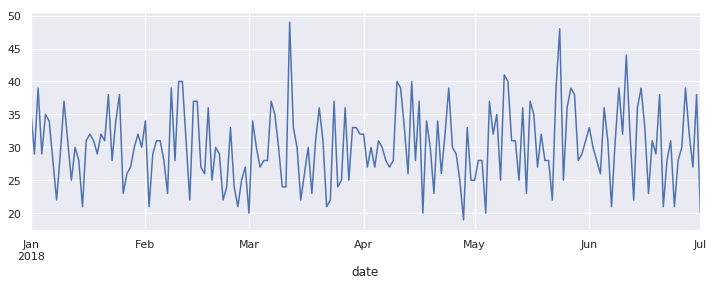

In [74]:
#e.g. first 6 months of 2018 - just use slicing
df['sales']['2018-01-01':'2018-07-01'].plot(figsize=(12,4));

### Easy ways to get access to specific types of dates

A simple way to do this is using the resample function.

In [76]:
df.resample(rule='A').mean() # year end frequency (Should be 30ish!)

,sales
date,
2018-12-31,30.161644
2019-12-31,30.197260


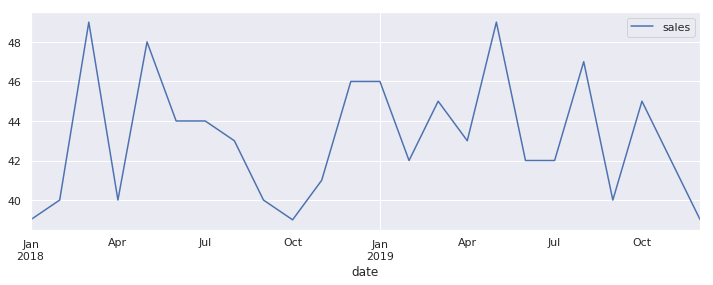

In [80]:
df.resample(rule='M').max().plot.line(figsize=(12,4)) # month end maximum sales